#  1 .Read and visualise data

In [1]:
#Overview
#HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

#My job is:-

#To categorise the countries using some socio-economic and health factors that determine the overall development of the country.
#We need to suggest the countries which the CEO needs to focus on the most.
#The steps are broadly:

#Read and understand the data
#Clean the data
#Visualization of data
#Prepare the data for modelling
#Modelling
#Final analysis

In [2]:
#import all the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# read the dataset
df = pd.read_csv("C:\\Users\\mohit_2\\Desktop\\cluster\\Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Clean the data

In [7]:
# check missing values
round(100*(df.isnull().sum())/len(df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

# Exploratory Data Analytics

In [9]:
# converted Exprort ,import ,health in actual number it is given in percentage

In [10]:
df["exports"] = (df["exports"]/100)*df["gdpp"]
df["imports"] = (df["imports"]/100)*df["gdpp"]
df["health"] = (df["health"]/100)*df["gdpp"]
df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [11]:
# coverted dtype of income and gdpp 
df.income = df.income.astype('float')
df.gdpp = df.gdpp.astype('float')

In [12]:
df.info()  # cross check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [13]:
df.describe(percentiles = [0.25,0.50, 0.75, 0.85,0.95,0.97,0.98,0.96])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
85%,88.310000,12667.230000,2202.666000,11434.140000,36200.000000,15.330000,79.910000,5.023000,31090.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
96%,120.440000,34258.200000,5229.992000,27701.008000,56256.000000,22.544000,81.572000,6.153600,50876.000000


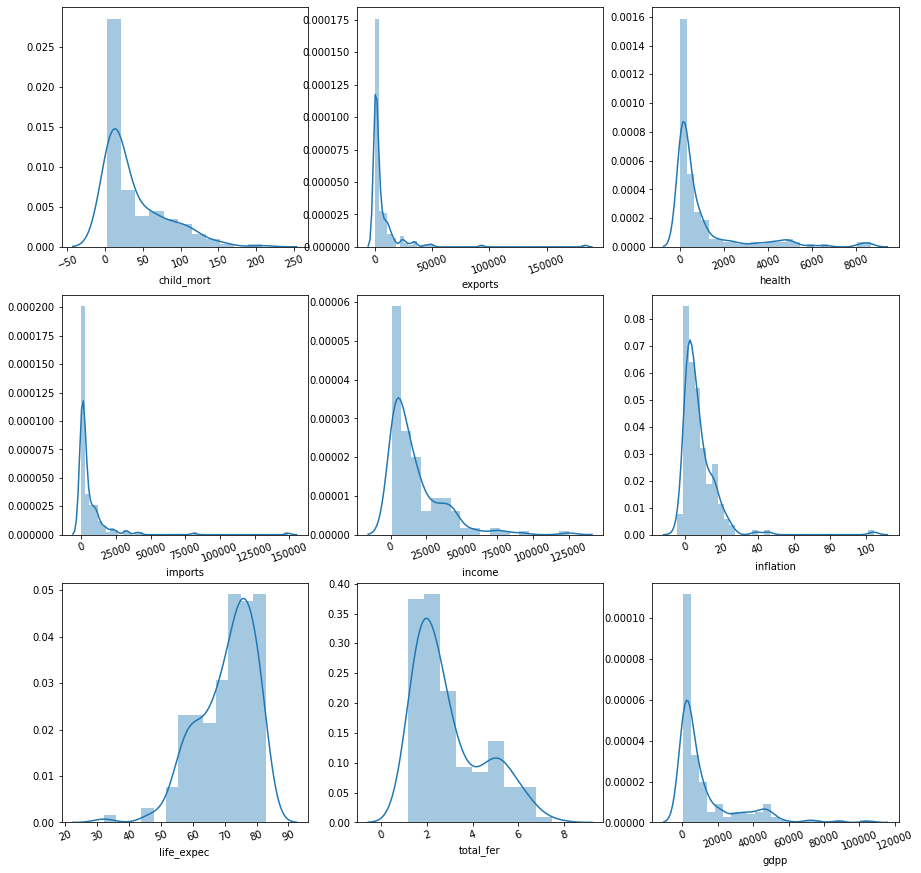

In [14]:
plt.figure(figsize=(15,15))
features = ['child_mort', 'exports', 'health', 'imports' , "income", "inflation", "life_expec" , "total_fer","gdpp"]
for i in enumerate(features): 
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation = 20)

# Outlier Analysis

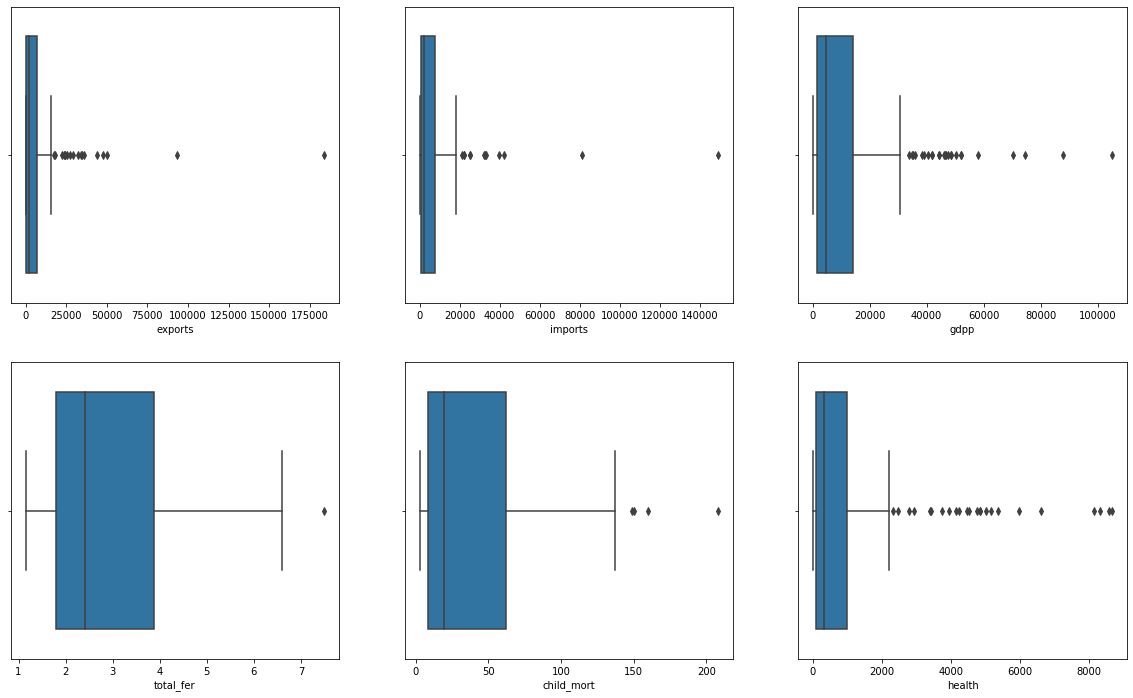

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(df["exports"])

plt.subplot(2,3,2)
sns.boxplot(df["imports"])
plt.subplot(2,3,3)
sns.boxplot(df["gdpp"])
#plt.subplot(2,3,4)
#sns.boxplot(df["life_expec"])
plt.subplot(2,3,4)
sns.boxplot(df["total_fer"])
plt.subplot(2,3,5)
sns.boxplot(df["child_mort"])
plt.subplot(2,3,6)
sns.boxplot(df["health"])

In [17]:
# we saw outlier

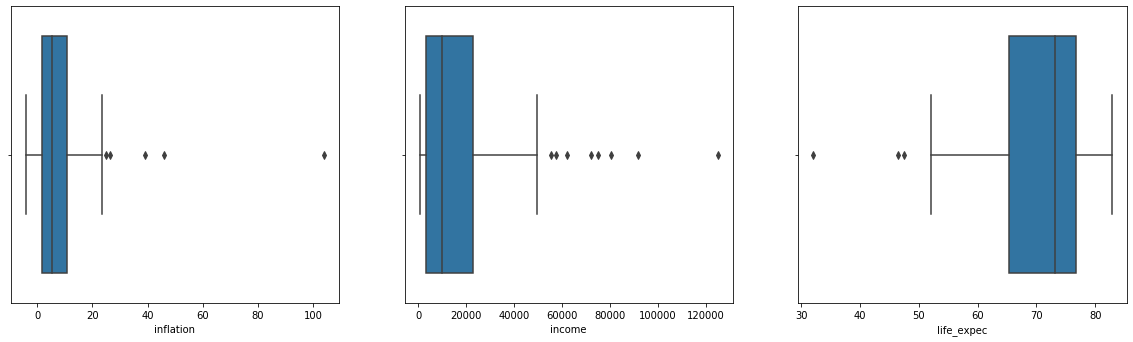

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(df["inflation"])
plt.subplot(2,3,2)
sns.boxplot(df["income"])
plt.subplot(2,3,3)
sns.boxplot(df["life_expec"])

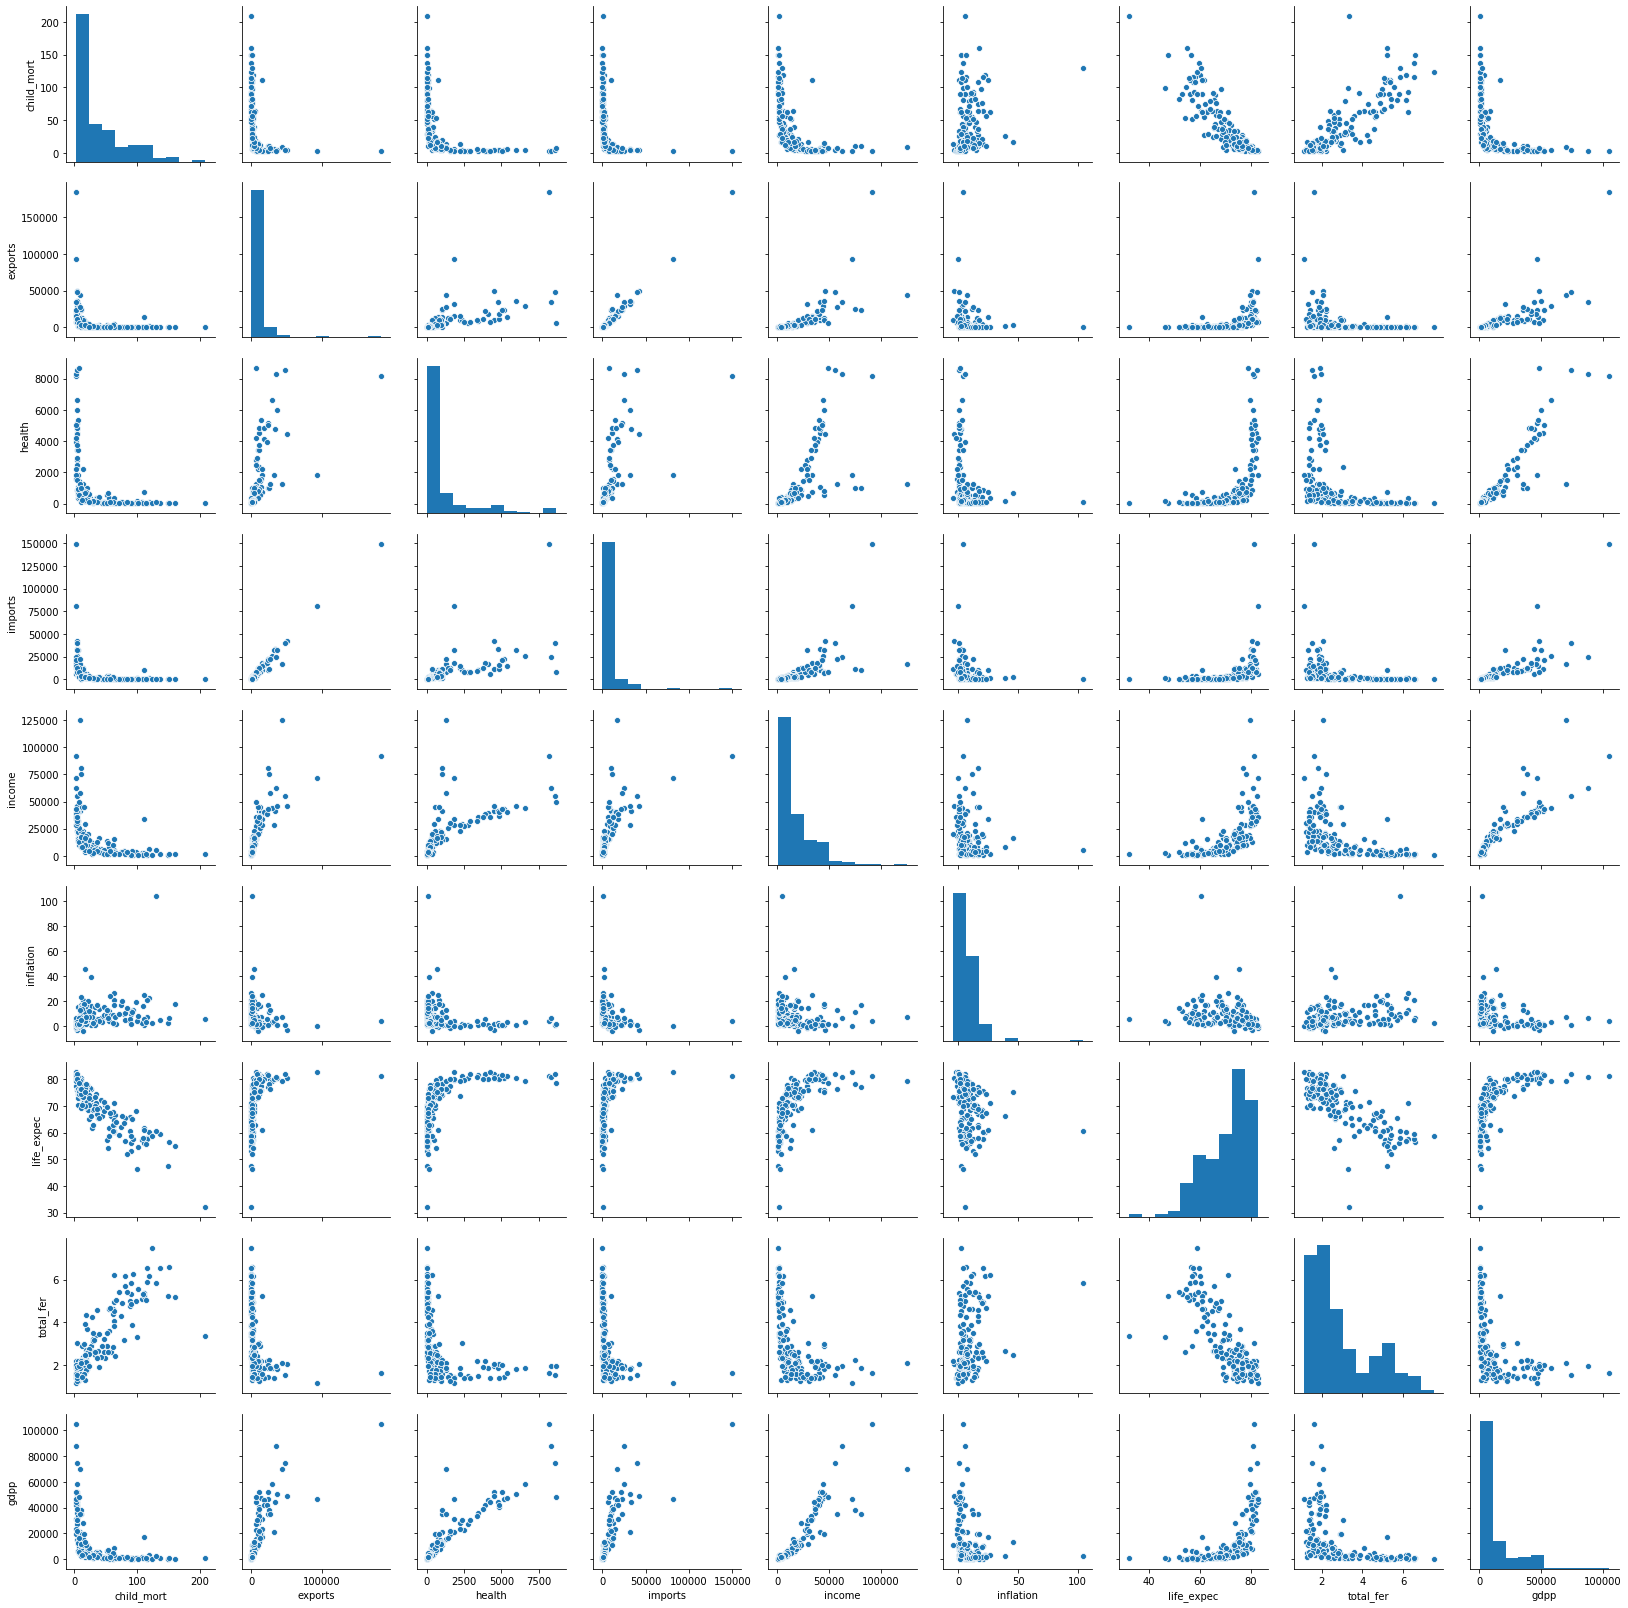

In [19]:
# # Visualisation of Numerical variables

sns.pairplot(df)
plt.show()

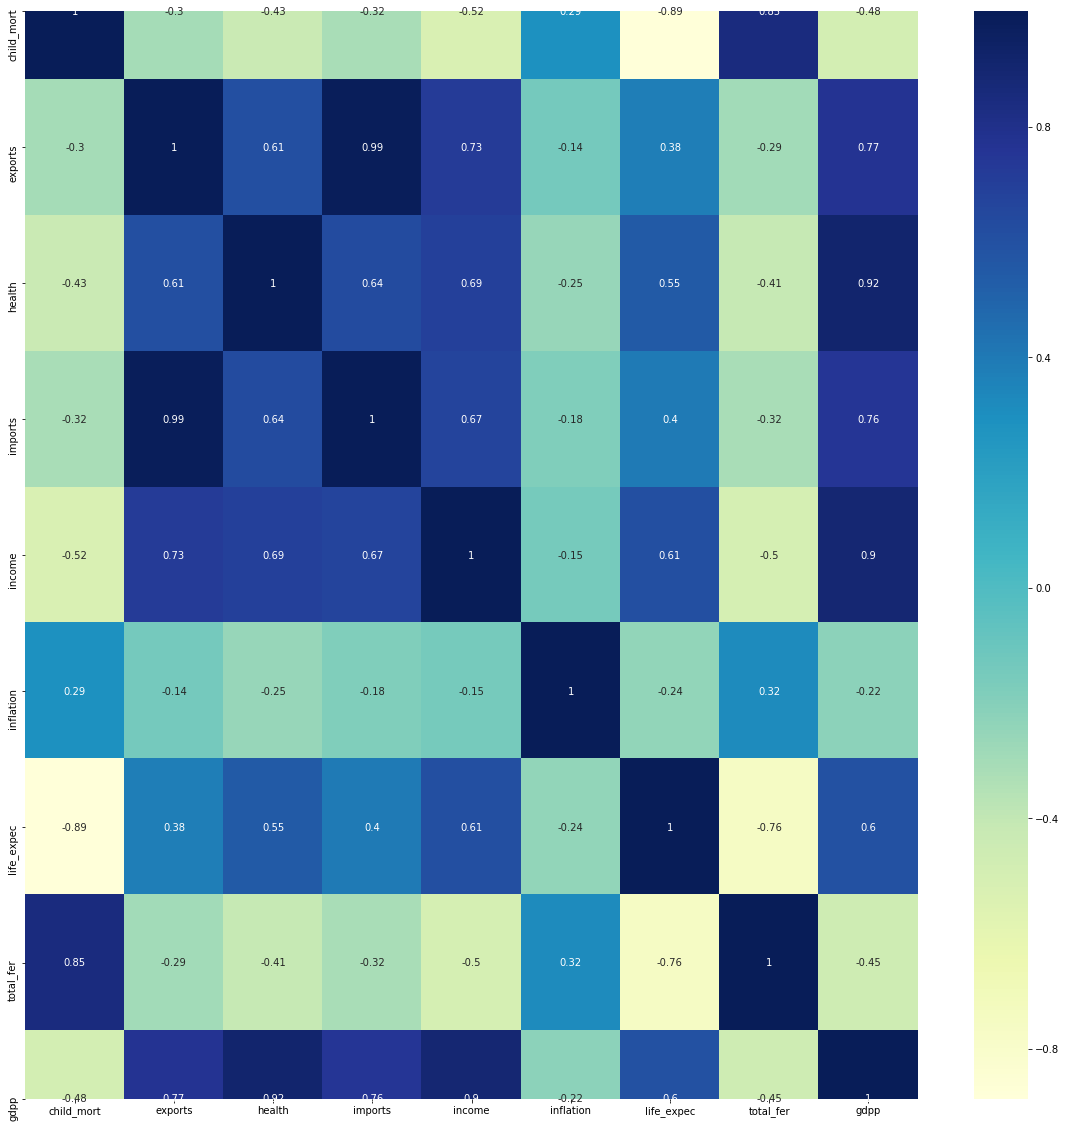

In [20]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Prepare the data for modelling

# Outlier treatment

In [22]:
Q1 = df['inflation'].quantile(0.01)
Q4 = df['inflation'].quantile(0.95)
df['inflation'][df['inflation'] <= Q1]=Q1
df['inflation'][df['inflation'] >= Q4]=Q4
df.shape

(167, 10)

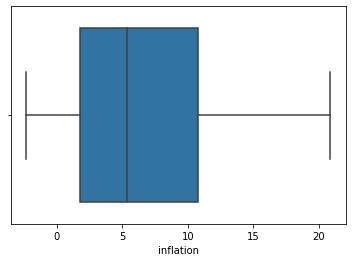

In [23]:
sns.boxplot(x='inflation', data=df)

In [24]:
Q1 = df['exports'].quantile(0.01)
Q4 = df['exports'].quantile(0.90)
df['exports'][df['exports'] <= Q1]=Q1
df['exports'][df['exports'] >= Q4]=Q4
df.shape

(167, 10)

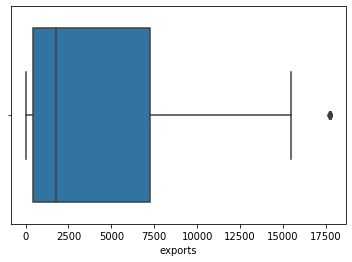

In [25]:
sns.boxplot(x='exports', data=df)

In [26]:
Q1 = df['imports'].quantile(0.01)
Q4 = df['imports'].quantile(0.93)
df['imports'][df['imports'] <= Q1]=Q1
df['imports'][df['imports'] >= Q4]=Q4
df.shape

(167, 10)

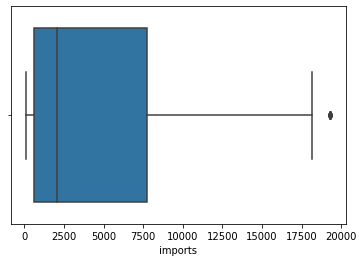

In [27]:
sns.boxplot(x='imports', data=df)

In [28]:
Q1 = df['gdpp'].quantile(0.01)
Q4 = df['gdpp'].quantile(0.87)
df['gdpp'][df['gdpp'] <= Q1]=Q1
df['gdpp'][df['gdpp'] >= Q4]=Q4
df.shape

(167, 10)

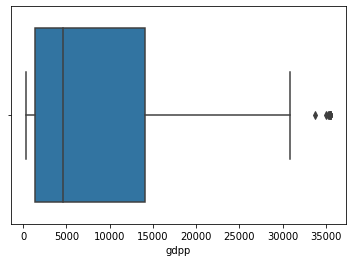

In [29]:
sns.boxplot(x='gdpp', data=df)

In [30]:
Q1 = df['health'].quantile(0.01)
Q4 = df['health'].quantile(0.87)
df['health'][df['health'] <= Q1]=Q1
df['health'][df['health'] >= Q4]=Q4
df.shape

(167, 10)

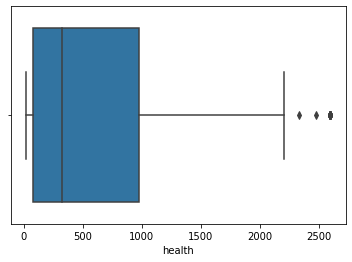

In [31]:
sns.boxplot(x='health', data=df)

In [32]:
Q1 = df['total_fer'].quantile(0.01)
Q4 = df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer'] <= Q1]=Q1
df['total_fer'][df['total_fer'] >= Q4]=Q4
df.shape

(167, 10)

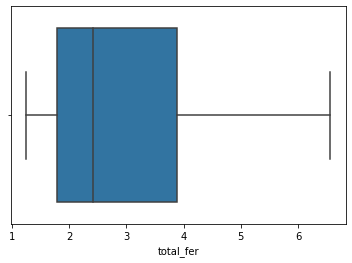

In [33]:
sns.boxplot(x='total_fer', data=df)

In [34]:
Q1 = df['life_expec'].quantile(0.03)
Q4 = df['life_expec'].quantile(0.99)
df['life_expec'][df['life_expec'] <= Q1]=Q1
df['life_expec'][df['life_expec'] >= Q4]=Q4
df.shape

(167, 10)

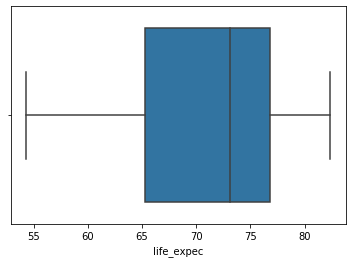

In [35]:
sns.boxplot(x='life_expec', data=df)

In [36]:
Q1 = df['child_mort'].quantile(0.01)
Q4 = df['child_mort'].quantile(0.99)
df['child_mort'][df['child_mort'] <= Q1]=Q1
df['child_mort'][df['child_mort'] >= Q4]=Q4
df.shape

(167, 10)

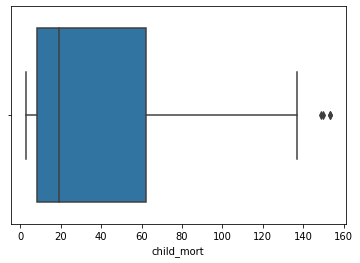

In [37]:
sns.boxplot(x='child_mort', data=df)

In [38]:
Q1 = df['income'].quantile(0.01)
Q4 = df['income'].quantile(0.95)
df['income'][df['income'] <= Q1]=Q1
df['income'][df['income'] >= Q4]=Q4
df.shape

(167, 10)

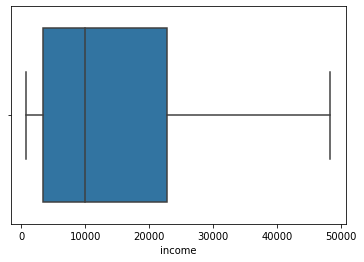

In [39]:
sns.boxplot(x='income', data=df)

# Hopkins 

In [41]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
#Let's check the Hopkins measure
hopkins(df.drop('country', axis = 1))

0.8692437307103473

In [43]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
df1 = df.drop('country', axis = 1)

In [44]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


# Scalling the data

In [45]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

In [46]:
df1 = pd.DataFrame(df1)
df1.columns = ["child_mort", "exports", "health", "imports" , "income" , "inflation", "life_expec" , "total_fer", "gdpp"]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.797324,-0.767530,-0.783718,-0.958490,0.393469,-1.782730,1.926928,-0.827266
1,-0.547543,-0.611671,-0.510766,-0.485994,-0.394106,-0.387374,0.672966,-0.865911,-0.538704
2,-0.272548,-0.515013,-0.603838,-0.586517,-0.192637,1.444058,0.697401,-0.035427,-0.508517
3,2.084186,-0.432134,-0.700847,-0.567016,-0.667480,2.196506,-1.306251,2.154642,-0.584391
4,-0.709457,0.138812,0.020727,0.403711,0.227937,-0.868499,0.734053,-0.544433,0.122943


# Modelling

# K means clustring

In [47]:
# Look at the silhouette score plot and choose the optimal number of cluster

In [48]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.49606284789170424
For n_clusters=3, the silhouette score is 0.4314135184559001
For n_clusters=4, the silhouette score is 0.322294324547566
For n_clusters=5, the silhouette score is 0.32069056821767983
For n_clusters=6, the silhouette score is 0.2922128095874792
For n_clusters=7, the silhouette score is 0.3048019159039079
For n_clusters=8, the silhouette score is 0.3270857585470586


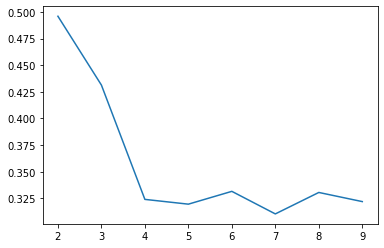

In [49]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

In [50]:
# Look at the Elbow Curve plot and choose the optimal number of cluster

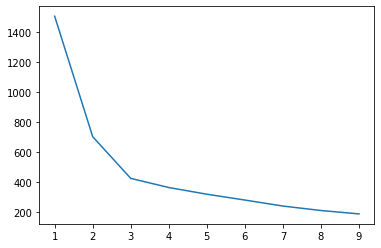

In [51]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

# KMeans with the K the we have choosed 

In [53]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [54]:
## Let's make a copy of our original data before using it for analysis
df2 = df.copy()

In [55]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [56]:
col = df.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [57]:
# Let's add the cluster Ids to the original data 
df_km = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ["country","child_mort", "exports", "health", "imports" , "income" , "inflation", "life_expec" , "total_fer", "gdpp",'cluster_id']
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [58]:
# Cross-check
df_km.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster_id    0
dtype: int64

In [59]:
# Check the count of observation per cluster
df_km['cluster_id'].value_counts()

1    78
0    48
2    41
Name: cluster_id, dtype: int64

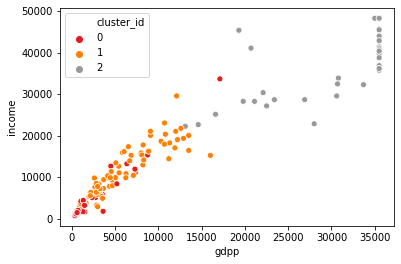

In [60]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

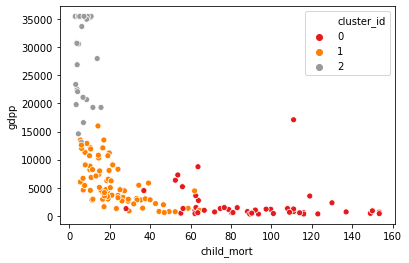

In [61]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

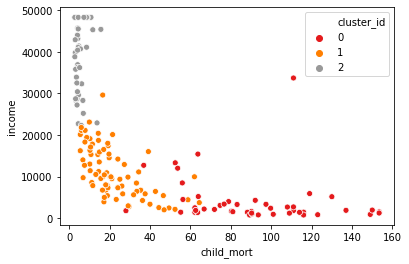

In [62]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

# Cluster_profiling

In [63]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


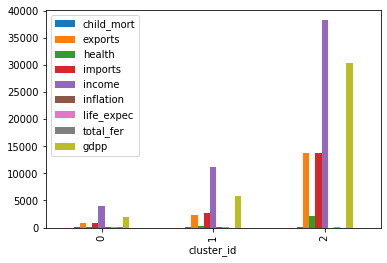

In [64]:
df_km.groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

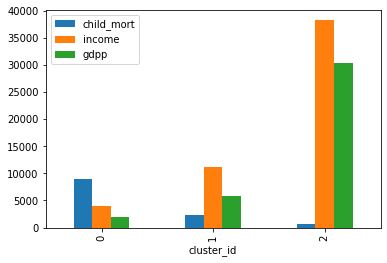

In [65]:
df_km["child_mort"] = df_km["child_mort"]*100
df_km.drop('country', axis = 1)[['child_mort','income', "gdpp", 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')


In [66]:
#Let's use the concept of binning
df_km[df_km['cluster_id']==0]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [67]:
df_km[df_km['cluster_id']==0].sort_values(by=["gdpp", 'income', "child_mort"], ascending=[True, True,False]).head(25) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,8930.0,62.457000,38.586000,302.80200,742.24,5.470,60.800,5.0200,331.62,0
26,Burundi,9360.0,22.243716,26.796000,104.90964,764.00,12.300,57.700,6.2600,331.62,0
37,"Congo, Dem. Rep.",11600.0,137.274000,26.419400,165.66400,742.24,20.800,57.500,6.5400,334.00,0
112,Niger,12300.0,77.256000,17.956800,170.86800,814.00,2.550,58.800,6.5636,348.00,0
132,Sierra Leone,15340.0,67.032000,52.269000,137.65500,1220.00,17.200,55.000,5.2000,399.00,0
93,Madagascar,6220.0,103.250000,17.009362,177.59000,1390.00,8.790,60.800,4.6000,413.00,0
106,Mozambique,10100.0,131.985000,21.829900,193.57800,918.00,7.640,54.500,5.5600,419.00,0
31,Central African Republic,14900.0,52.628000,17.750800,118.19000,888.00,2.010,54.276,5.2100,446.00,0
94,Malawi,9050.0,104.652000,30.248100,160.19100,1030.00,12.100,54.276,5.3100,459.00,0
50,Eritrea,5520.0,23.087800,17.009362,112.30600,1420.00,11.600,61.700,4.6100,482.00,0


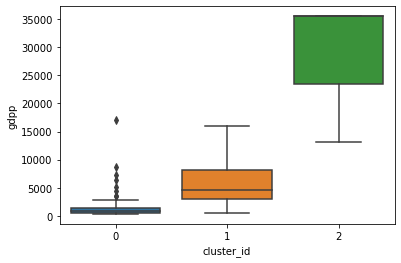

In [68]:
sns.boxplot(x='cluster_id', y='gdpp', data=df_km)

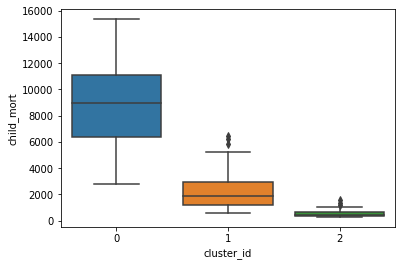

In [69]:
sns.boxplot(x='cluster_id', y='child_mort', data=df_km)

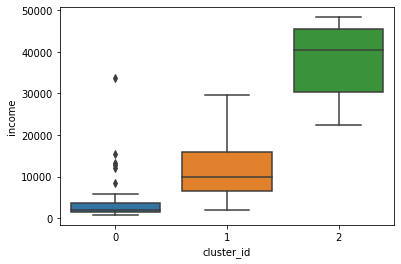

In [70]:
sns.boxplot(x='cluster_id', y='income', data=df_km)

In [71]:
#from above visualisation we conclude that cluster 0 need funds 

# Hierarchical Clustering

In [72]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.797324,-0.767530,-0.783718,-0.958490,0.393469,-1.782730,1.926928,-0.827266
1,-0.547543,-0.611671,-0.510766,-0.485994,-0.394106,-0.387374,0.672966,-0.865911,-0.538704
2,-0.272548,-0.515013,-0.603838,-0.586517,-0.192637,1.444058,0.697401,-0.035427,-0.508517
3,2.084186,-0.432134,-0.700847,-0.567016,-0.667480,2.196506,-1.306251,2.154642,-0.584391
4,-0.709457,0.138812,0.020727,0.403711,0.227937,-0.868499,0.734053,-0.544433,0.122943


In [73]:
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,9020.0,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,1660.0,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,2730.0,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,11900.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,0
4,Antigua and Barbuda,1030.0,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


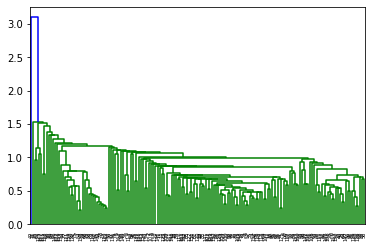

In [74]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

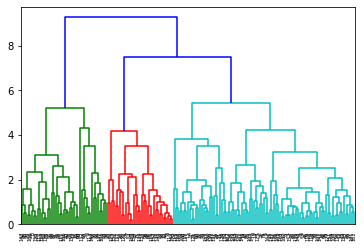

In [75]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [76]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [77]:
# assign cluster labels
df_km['cluster_labels'] = cluster_labels
df_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,9020.0,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,1660.0,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,2730.0,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,11900.0,2199.19,100.6050,1514.370,5900.0,20.87,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,1030.0,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


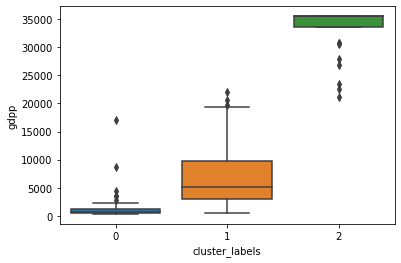

In [78]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df_km)

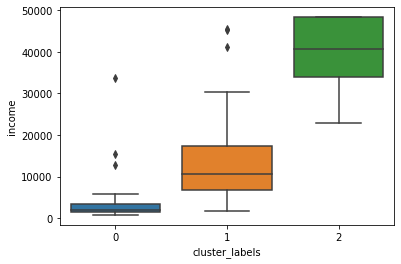

In [79]:
sns.boxplot(x='cluster_labels', y='income', data=df_km)

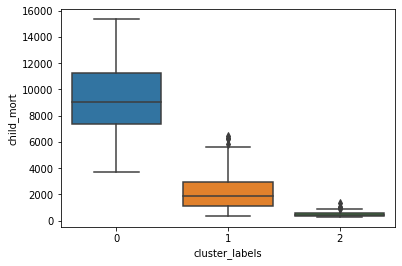

In [80]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df_km)

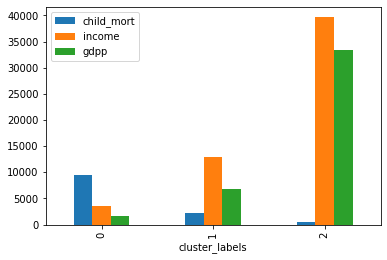

In [81]:
df_km.drop('country', axis = 1)[['child_mort','income', "gdpp", 'cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [82]:
# from above visualisation we conclude that cluster 0 need funds . because of low gdpp ,low income, high child_mort

# Final Analysis

In [84]:
df_km[df_km['cluster_labels']==0].sort_values(by=["gdpp", 'income', "child_mort"], ascending=[True, True,False]).head(5) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
88,Liberia,8930.0,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,0,0
26,Burundi,9360.0,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,0,0
37,"Congo, Dem. Rep.",11600.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,0,0
112,Niger,12300.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,0,0
132,Sierra Leone,15340.0,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,0,0


In [85]:
#These are the top 5 countries which need to be funded by the NGO.
